# PMBus on the RFSoC4x2
----

## Aim/s
* Explore the monitoring power rails using PMBus through PYNQ.

## Last revised
* 27Jan21 - Initial revision
----

The board has some support for monitoring power rails on the board using PMBus.
PYNQ exposes these rails through the `get_rails` function that returns a dictionary
of all of the rails available to be monitored.

In [1]:
import pynq

rails = pynq.get_rails()
rails

{'VCCpSYZYGY_VIO': Rail {name=VCCpSYZYGY_VIO, voltage=Sensor {name=VCCpSYZYGY_VIO_voltage, value=0.336V}, current=Sensor {name=VCCpSYZYGY_VIO_current, value=0.0A}, power=Sensor {name=VCCpSYZYGY_VIO_power, value=0.0W}},
 'VDAC_AVCCAUX': Rail {name=VDAC_AVCCAUX, voltage=Sensor {name=VDAC_AVCCAUX_voltage, value=1.832V}, current=Sensor {name=VDAC_AVCCAUX_current, value=0.117A}, power=Sensor {name=VDAC_AVCCAUX_power, value=0.22W}},
 'VADC_AVCC': Rail {name=VADC_AVCC, voltage=Sensor {name=VADC_AVCC_voltage, value=0.952V}, current=Sensor {name=VADC_AVCC_current, value=0.913A}, power=Sensor {name=VADC_AVCC_power, value=0.86W}},
 'VCCp1V8': Rail {name=VCCp1V8, voltage=Sensor {name=VCCp1V8_voltage, value=1.824V}, current=Sensor {name=VCCp1V8_current, value=1.1A}, power=Sensor {name=VCCp1V8_power, value=2.0W}},
 'VCCp0V85': Rail {name=VCCp0V85, voltage=Sensor {name=VCCp0V85_voltage, value=0.884V}, current=Sensor {name=VCCp0V85_current, value=6.3A}, power=Sensor {name=VCCp0V85_power, value=5.6W}},

As can be seen, the keys of the dictionary are the names of the voltage rails
while the values are `Rail` objects which contain three sensors for the voltage, 
current and power.

To see how power changes under CPU load we can use the `DataRecorder` class.
For this example we are going to look at the `0V85` rail listed above
as we load one of the CPU cores in Python.

In [2]:
recorder = pynq.DataRecorder(rails["VCCp0V85"].power)

We can now use the recorder to monitor the applied sensor. 
For this example we'll sample the power every half second while sleeping
and performing a dummy loop.

In [3]:
import time

with recorder.record(0.5):
    time.sleep(5)
    for _ in range(10000000):
        pass
    time.sleep(5)

The `DataRecorder` exposes the sensor data as a pandas dataframe.

In [4]:
recorder.frame

,Mark,VCCp0V85_power
2021-12-08 14:02:45.623688,0.0,5.8
2021-12-08 14:02:46.140049,0.0,5.6
2021-12-08 14:02:46.652113,0.0,5.6
2021-12-08 14:02:47.164241,0.0,5.2
2021-12-08 14:02:47.676303,0.0,5.6
2021-12-08 14:02:48.188260,0.0,5.6
2021-12-08 14:02:48.700338,0.0,5.6
2021-12-08 14:02:49.212251,0.0,5.2
2021-12-08 14:02:49.724267,0.0,5.2
2021-12-08 14:02:50.236246,0.0,5.6


or by plotting the results using matplotlib

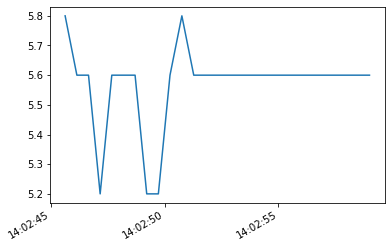

In [5]:
%matplotlib inline
recorder.frame["VCCp0V85_power"].plot()

We can get more information by using the `mark` function which will increment
the invocation number without having to stop and start the recorder.

array([<matplotlib.axes._subplots.AxesSubplot object at 0xffff684b2280>,
      dtype=object)

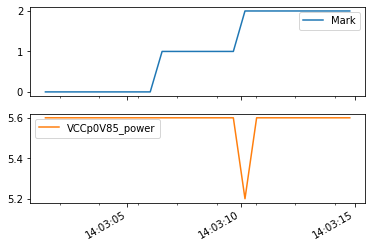

In [6]:
recorder.reset()
with recorder.record(0.5):
    time.sleep(5)
    recorder.mark()
    for _ in range(10000000):
        pass
    recorder.mark()
    time.sleep(5)

recorder.frame.plot(subplots=True)

This clearly shows the power spike when the for loop starts running.

---
Copyright (C) 2022 Xilinx, Inc

SPDX-License-Identifier: BSD-3-Clause

----

----